In [11]:
from PIL import Image
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

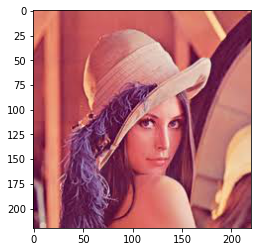

In [12]:
img = io.imread('download.png')
plt.imshow(img)

In [13]:
img.shape

(220, 220, 3)

In [14]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

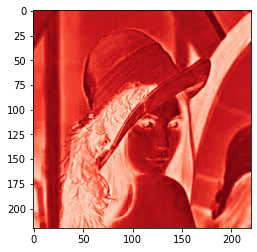

In [15]:
# plt.subplot(3, 2, 1)
plt.imshow(red,cmap="Reds")

# plt.subplot(3, 2, 2)
# plt.imshow(green,cmap="Greens")

# plt.subplot(3, 2, 3)
# plt.imshow(blue,cmap="Blues")

In [16]:
def filter_img(img,f=3):
    (rows,cols,channel) = img.shape
    stride = 2
    
    #output dimensions
    n_rows = int(1+(rows-f)/stride)
    n_cols = int(1+(cols-f)/stride)
    n_channels = channel
    
    n_image = np.zeros((n_rows,n_cols,n_channels))
    
    for h in range(n_rows):
        for w in range(n_cols):
            for c in range(n_channels):
                vert_start = h * stride
                vert_end = vert_start + f
                horz_start = w * stride
                horz_end = horz_start + f
                
                n_slice = img[vert_start:vert_end,horz_start:horz_end,c]
                n_image[h,w,c] = np.mean(n_slice,dtype=int)
    return n_image

(109, 109, 3)


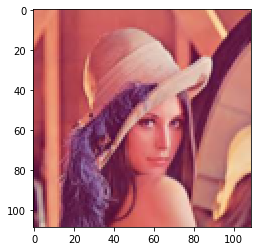

In [17]:
A = filter_img(img)
print(A.shape)
plt.imshow(A.astype('uint8'))

(106, 106, 3)


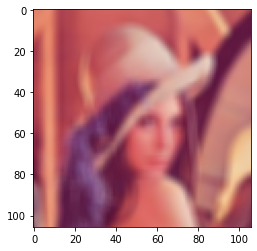

In [18]:
A = filter_img(img,f=10)
print(A.shape)
plt.imshow(A.astype('uint8'))

(98, 98, 3)


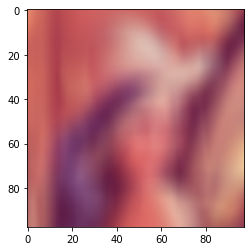

In [19]:
A = filter_img(img,f=25)
print(A.shape)
plt.imshow(A.astype('uint8'))

In [22]:
import tensorflow as tf

In [42]:
n = tf.random.normal((1,4,1))
print(n)

tf.Tensor(
[[[ 0.2790872 ]
  [-0.73200244]
  [-0.01749474]
  [ 0.7439039 ]]], shape=(1, 4, 1), dtype=float32)


In [45]:
conv1 = tf.keras.layers.Conv1D(1,3,1,padding='valid',activation=None)
m = conv1(n)

print(m)

tf.Tensor(
[[[ 0.47294465]
  [-0.8157513 ]]], shape=(1, 2, 1), dtype=float32)


In [56]:
n = tf.random.normal((1,16,16,1))
print(n.shape)

(1, 16, 16, 1)


In [53]:
conv2 = tf.keras.layers.Conv2D(8,[5,5],[1,1],padding='valid',activation=None)
m = conv2(n)

print(m.shape)

(1, 12, 12, 8)


In [64]:
print(conv2.weights[0].shape)

(5, 5, 1, 8)
